In [1]:
# import libraries
import os
from pathlib import Path
import pandas as pd
import funconnect
from funconnect.stats.like2like import load_glmm_results, load_bs_stats
from funconnect.visualization import like2like
from funconnect.utility.plot import rcParams, ColorPalletes
from funconnect.utility.connectomics import attach_node_attrs
from matplotlib import pyplot as plt

plt.rcParams.update(rcParams.arial_desat)
# Get the install directory of funconnect
funconnect_dir = Path(funconnect.__file__).parent
data_dir = funconnect_dir / "data"
result_dir = funconnect_dir / "results" / "like2like"

# load data
# TODO: download data automatically from BossDB
try:
    edge_data = pd.read_pickle(data_dir / "edge_data_v1.pkl")
    node_data = pd.read_pickle(data_dir / "node_data_v1.pkl")
    edge_data = attach_node_attrs(
        edge_data,
        node_data,
        [
            "cc_max_cvt",
            "cc_abs_cvt",
        ],
    )
except FileNotFoundError:
    raise FileNotFoundError("File not found: edge_data_v1.pkl, node_data_v1.pkl")

# load results
try:
    presyn_mean = pd.read_feather(result_dir / "area" / "presyn_mean.feather")
    presyn_stats = pd.read_feather(result_dir / "area" / "presyn_stats.feather")
    glmm_rslts = load_glmm_results(result_dir / "area")
    bs_stats = load_bs_stats(result_dir / "area")
    glmm_rslts_layer = load_glmm_results(result_dir / "area_layer")
except FileNotFoundError:
    raise FileNotFoundError(
        "Analysis results not found, please run the analysis first with `run_analysis.py`"
    )


 # Figure 2d

/src/microns-funconn-2025/funconnect/visualization/like2like.py:135: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  Patch(color=f"C{j}", edgecolor=f"C{j}", label=p)


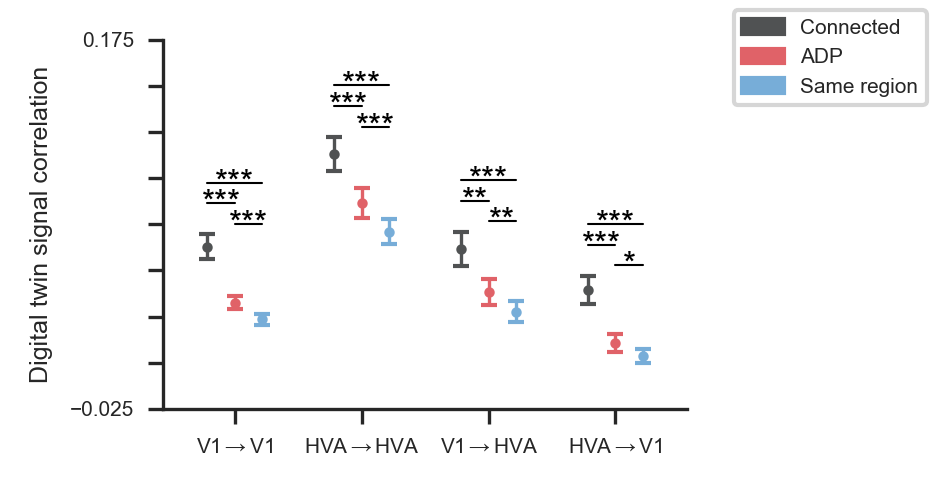

In [2]:
like2like.plot_presyn_mean(
    presyn_mean,
    presyn_stats,
    like2like.Variables.IN_SILICO_SIG_CORR_CVT,
)


 # Figure 2e, f

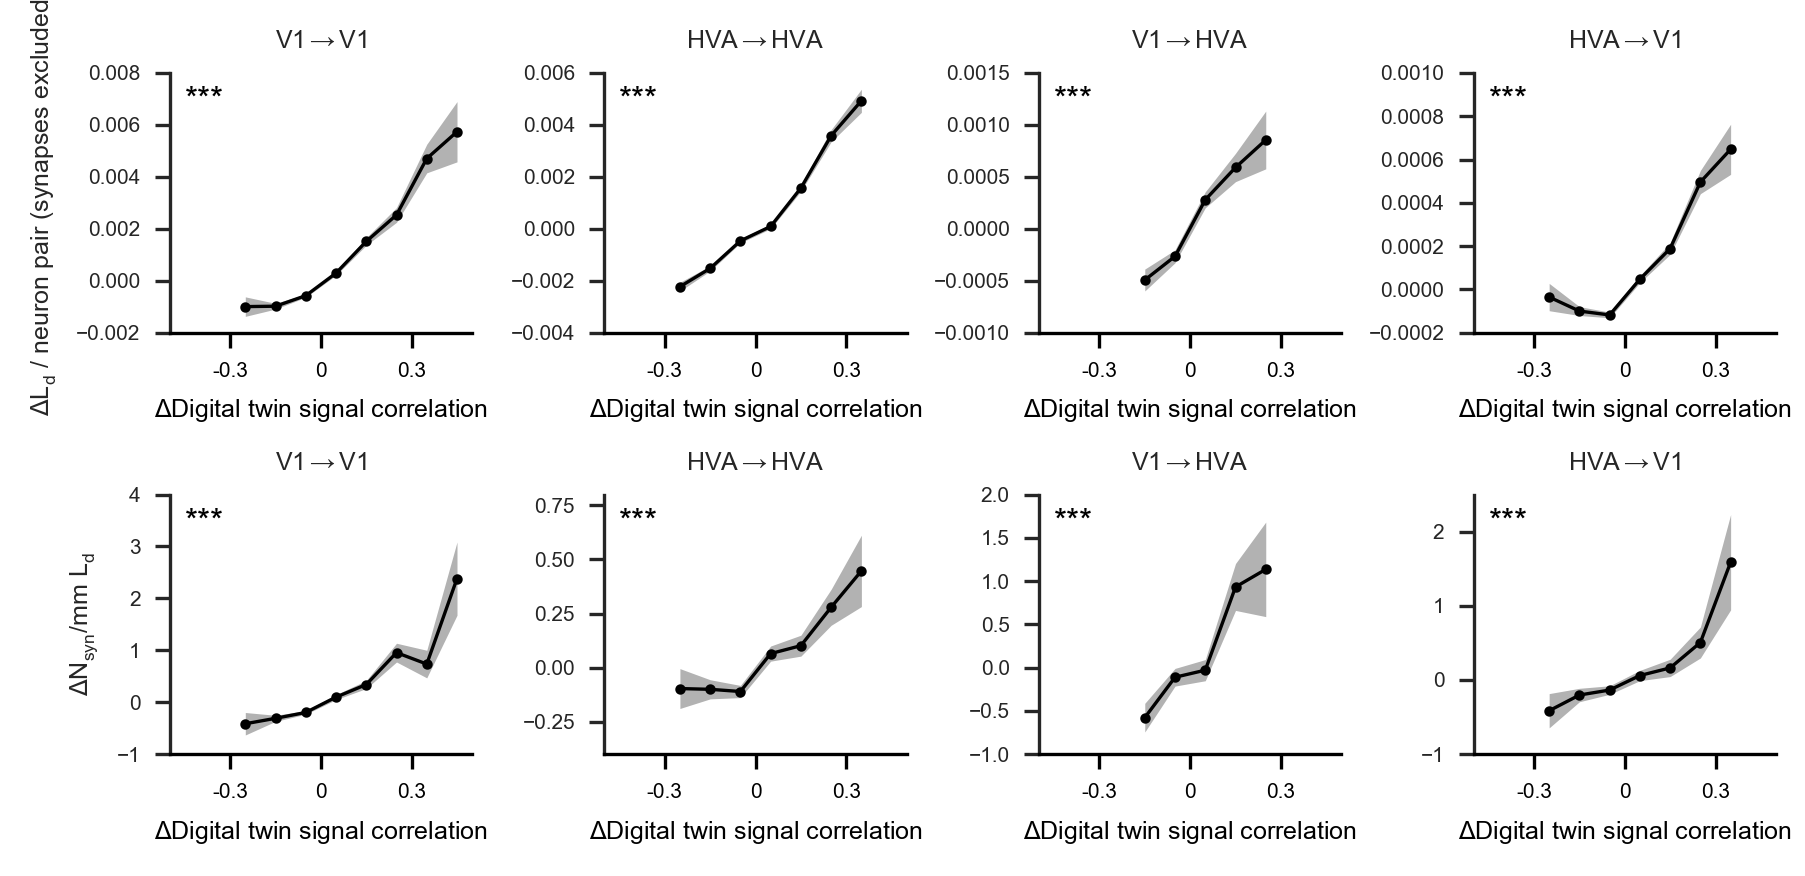

In [3]:
like2like.plot_like2like_area(
    glmm_rslts,
    bs_stats,
    variables=[
        like2like.Variables.IN_SILICO_SIG_CORR_CVT,
    ],
    quantities=[
        like2like.Quantities.LD_DENSITY_CONTROL,
        like2like.Quantities.SYNAPSE_DENSITY,
    ],
    filtering_quantity_name=like2like.Quantities.SYNAPSE_DENSITY.name,
    palette=["k"],
    x_lim_stds=5,
)


 # Figure 2g

,n,var,slope,intercept,p,slope_zscore,slope_zscore_abs
0,6608,Variables.IN_SILICO_SIG_CORR_CVT,0.03212,-0.119825,3.997107e-21,0.240602,0.240602


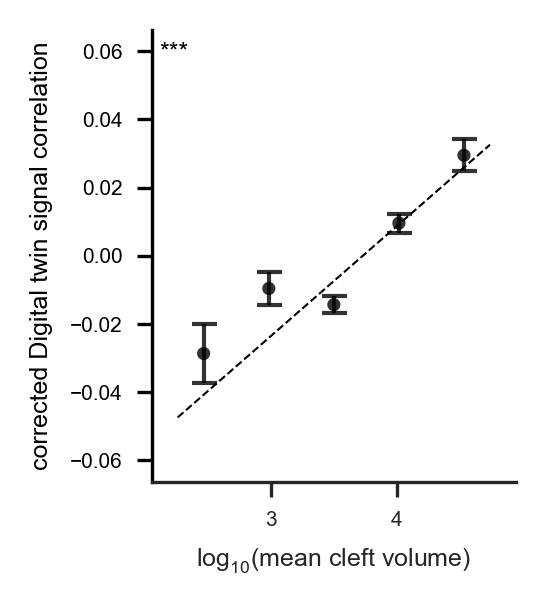

In [4]:
like2like.plot_synapse_quantity(
    variables=[like2like.Variables.IN_SILICO_SIG_CORR_CVT],
    quantity=like2like.Quantities.MEAN_SYNAPSE_SIZE,
    y_pos_lim=0.5,
    y_neg_lim=0.5,
    edge_data=edge_data,
    first_axis_side="left",
    palette=["k"],
)


 # Figure 2h

,n,var,slope,intercept,p,slope_zscore,slope_zscore_abs
0,6608,Variables.IN_SILICO_SIG_CORR_CVT,0.010156,-0.011351,0.009177,0.076072,0.076072


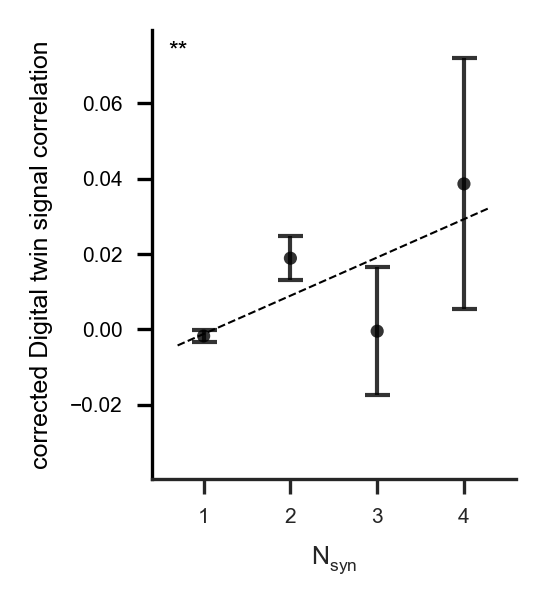

In [5]:
like2like.plot_synapse_quantity(
    variables=[like2like.Variables.IN_SILICO_SIG_CORR_CVT],
    quantity=like2like.Quantities.N_SYNAPSES_POSITIVE,
    y_pos_lim=0.6,
    y_neg_lim=0.3,
    edge_data=edge_data,
    first_axis_side="left",
    log=False,
    palette=["k"],
)


 # Figure 3a, b

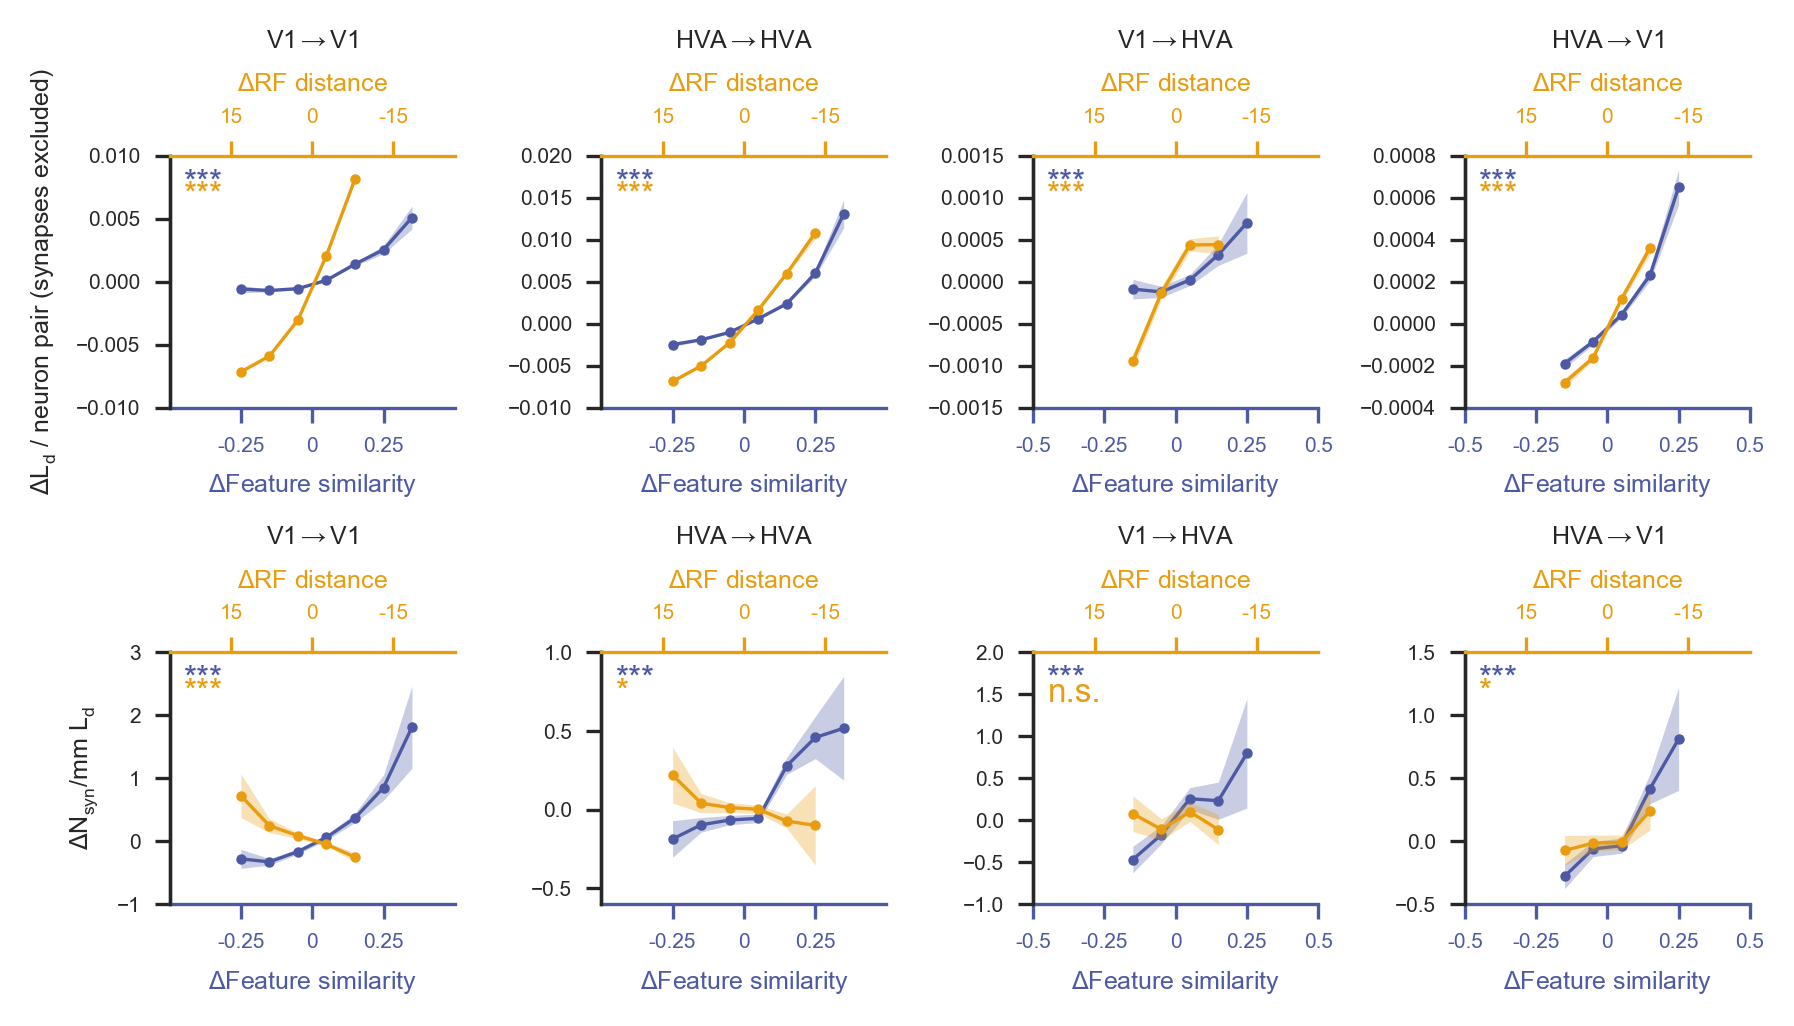

In [6]:
like2like.plot_like2like_area(
    glmm_rslts,
    bs_stats,
    variables=[
        like2like.Variables.READOUT_SIMILARITY_CVT,
        like2like.Variables.READOUT_LOCATION_DISTANCE_CVT,
    ],
    quantities=[
        like2like.Quantities.LD_DENSITY_CONTROL,
        like2like.Quantities.SYNAPSE_DENSITY,
    ],
    filtering_quantity_name=like2like.Quantities.SYNAPSE_DENSITY.name,
    palette=ColorPalletes.C3,
    x_lim_stds=5,
)


 # Figure 3c

,n,var,slope,intercept,p,slope_zscore,slope_zscore_abs
0,6608,Variables.READOUT_SIMILARITY_CVT,0.009498,-0.010616,0.003206,0.086234,0.086234
1,6608,Variables.READOUT_LOCATION_DISTANCE_CVT,-0.127209,0.142186,0.358160,-0.026703,0.026703


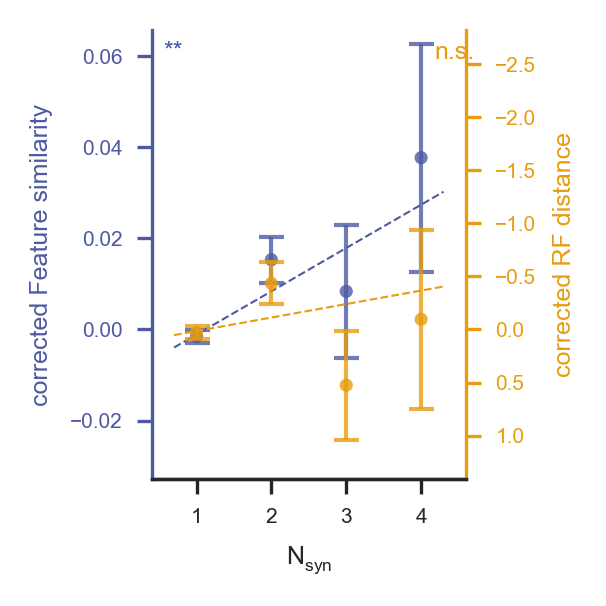

In [7]:
like2like.plot_synapse_quantity(
    variables=[
        like2like.Variables.READOUT_SIMILARITY_CVT,
        like2like.Variables.READOUT_LOCATION_DISTANCE_CVT,
    ],
    quantity=like2like.Quantities.N_SYNAPSES_POSITIVE,
    y_pos_lim=0.6,
    y_neg_lim=0.3,
    edge_data=edge_data,
    palette=ColorPalletes.C3,
    first_axis_side="left",
    log=False,
    figsize=[2, 2],
)


 # Figure 3d

,n,var,slope,intercept,p,slope_zscore,slope_zscore_abs
0,6608,Variables.READOUT_SIMILARITY_CVT,0.026099,-0.097365,1.881767e-20,0.236960,0.236960
1,6608,Variables.READOUT_LOCATION_DISTANCE_CVT,0.129639,-0.483619,2.852443e-01,0.027213,0.027213


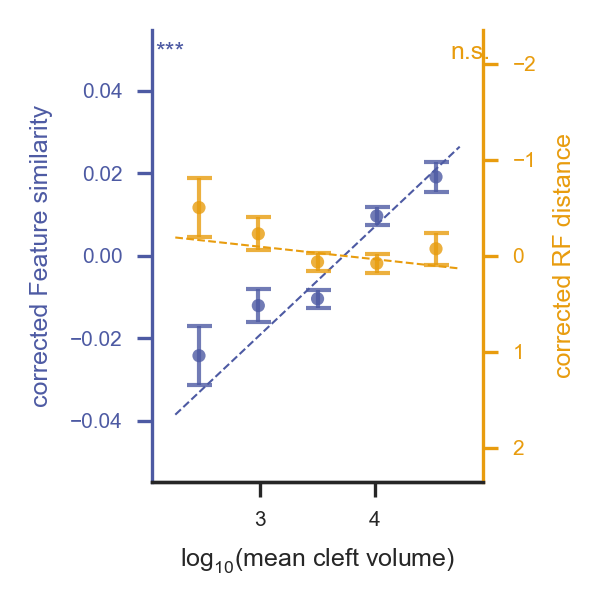

In [8]:
like2like.plot_synapse_quantity(
    variables=[
        like2like.Variables.READOUT_SIMILARITY_CVT,
        like2like.Variables.READOUT_LOCATION_DISTANCE_CVT,
    ],
    quantity=like2like.Quantities.MEAN_SYNAPSE_SIZE,
    y_pos_lim=0.5,
    y_neg_lim=0.5,
    edge_data=edge_data,
    palette=ColorPalletes.C3,
    first_axis_side="left",
    figsize=[2, 2],
)


# Figure 4a, c, e

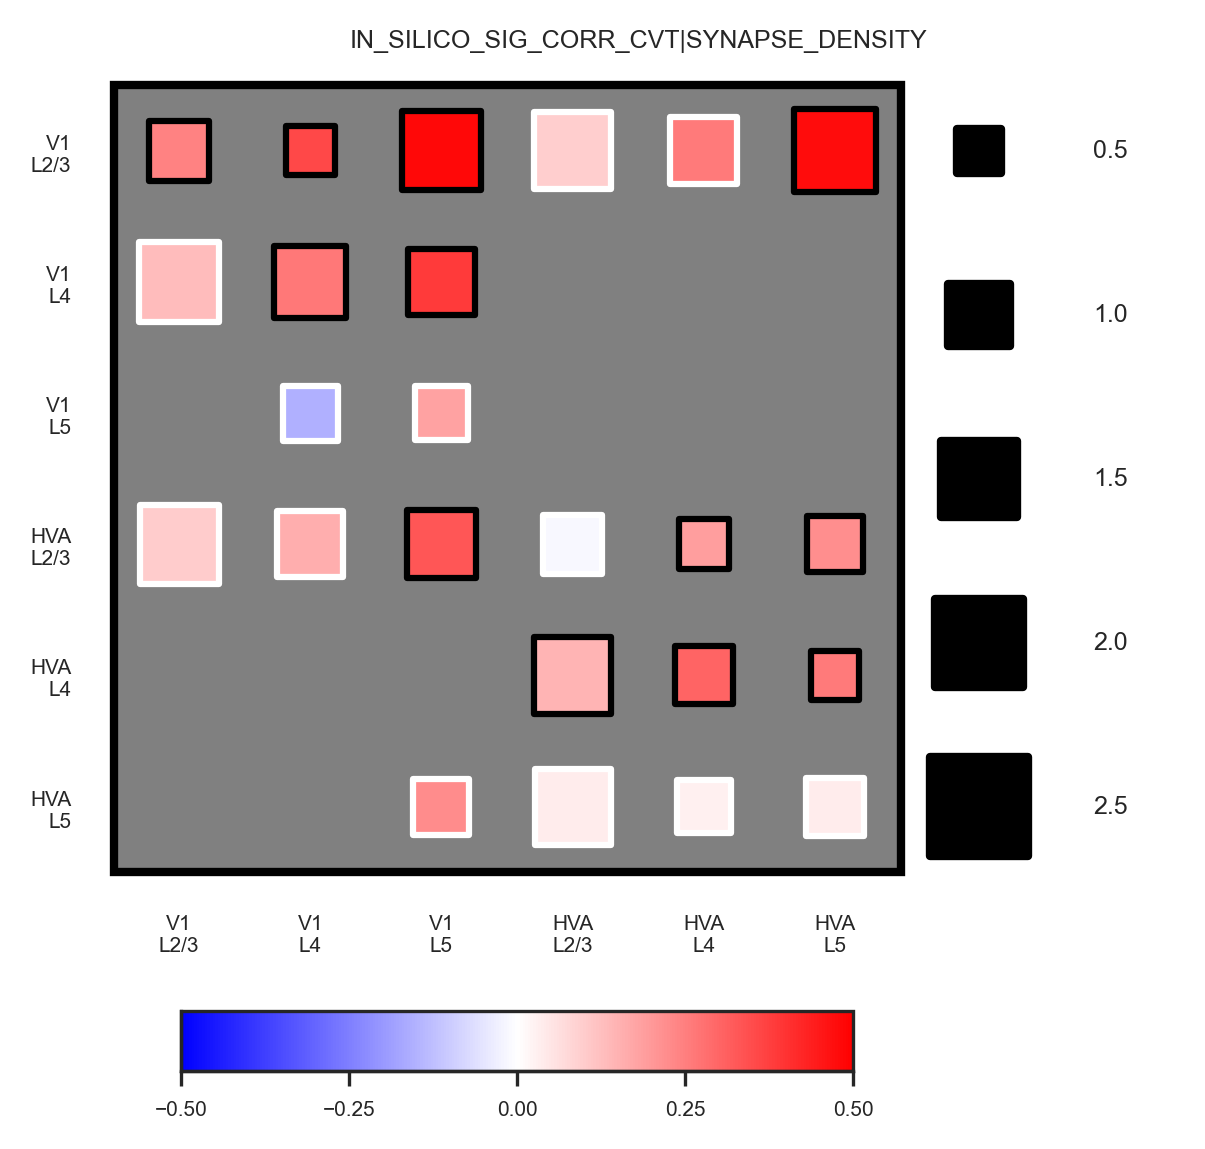

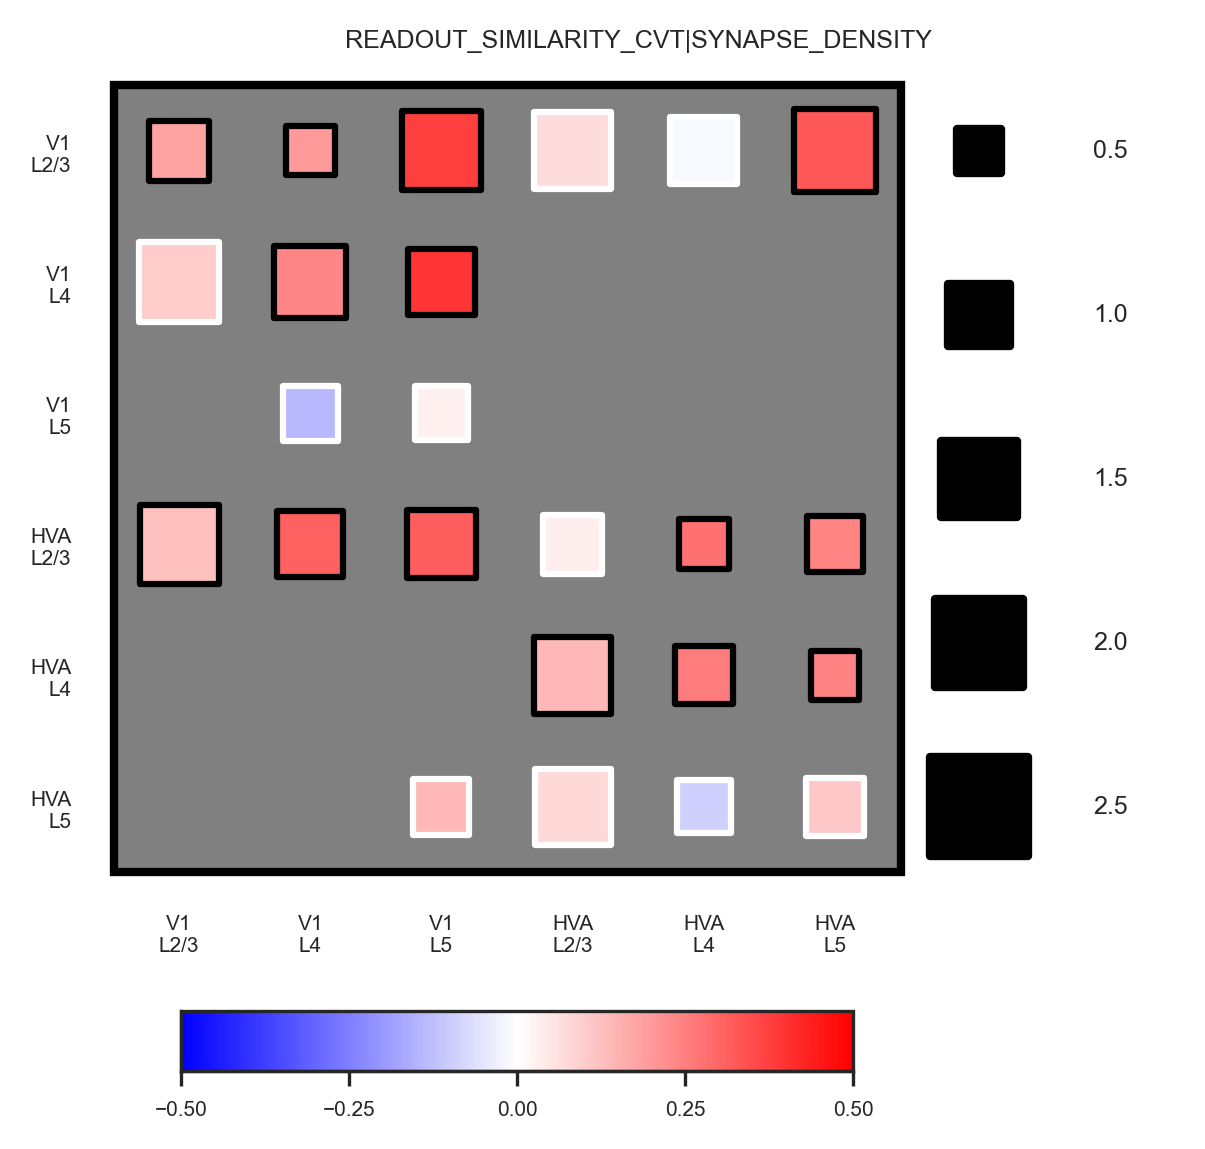

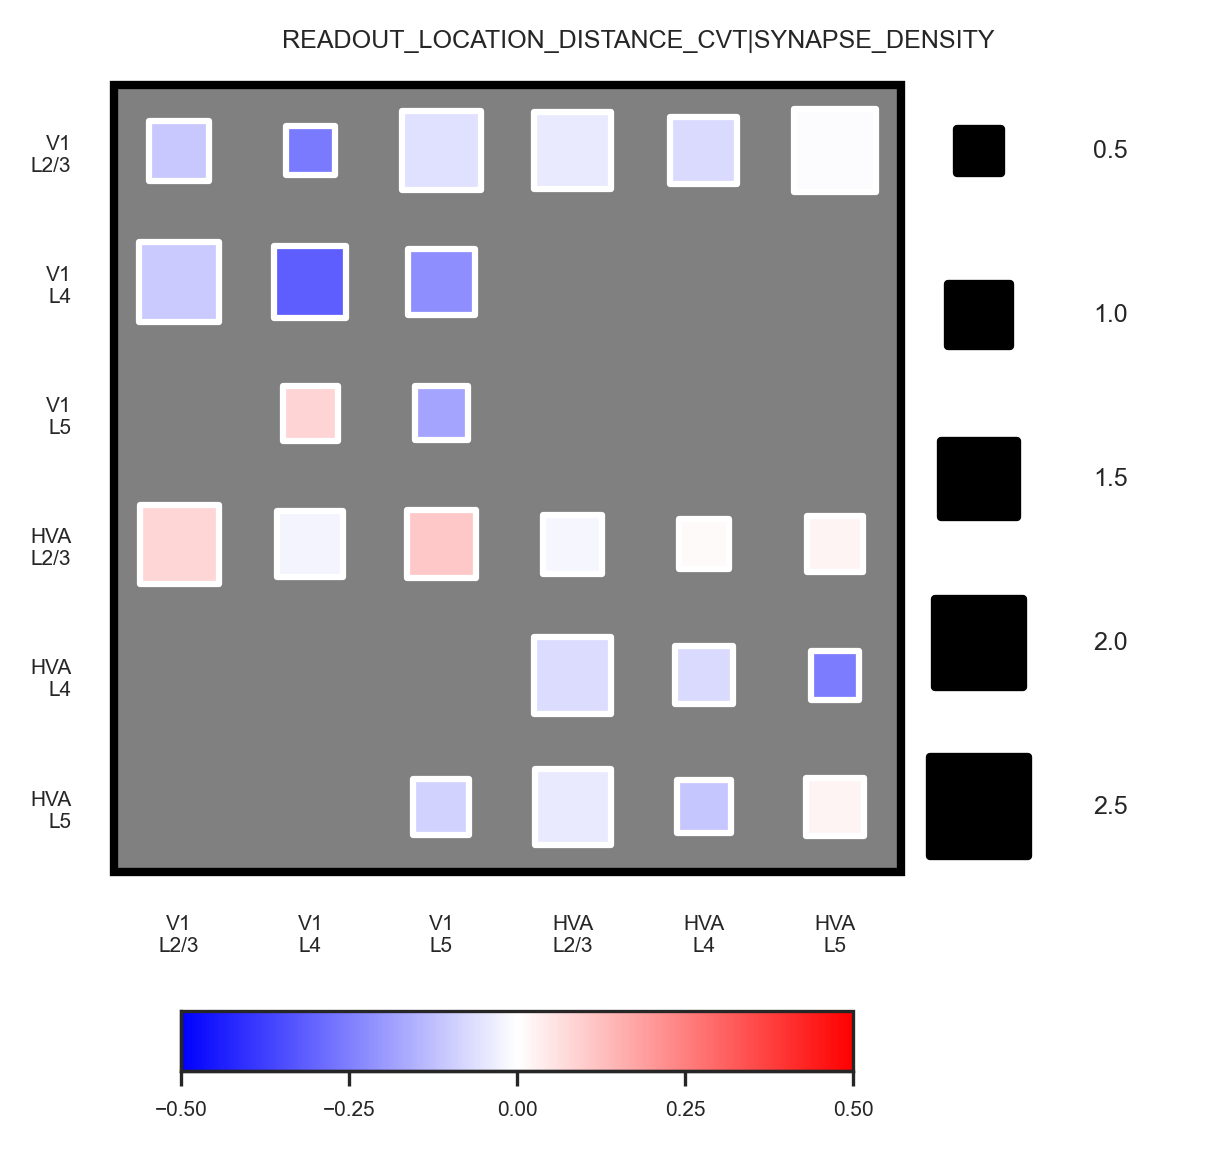

In [9]:
for variable in [
    like2like.Variables.IN_SILICO_SIG_CORR_CVT,
    like2like.Variables.READOUT_SIMILARITY_CVT,
    like2like.Variables.READOUT_LOCATION_DISTANCE_CVT,
]:
    like2like.plot_coef_matrix(
        glmm_rslts_layer,
        variable,
        like2like.Quantities.SYNAPSE_DENSITY,
        edge_data,
        legend_size_step=0.5,
        max_size=2.5,
        min_size=0,
    )
    plt.title(variable.name + "|" + like2like.Quantities.SYNAPSE_DENSITY.name)


# Figure 4b, d, f

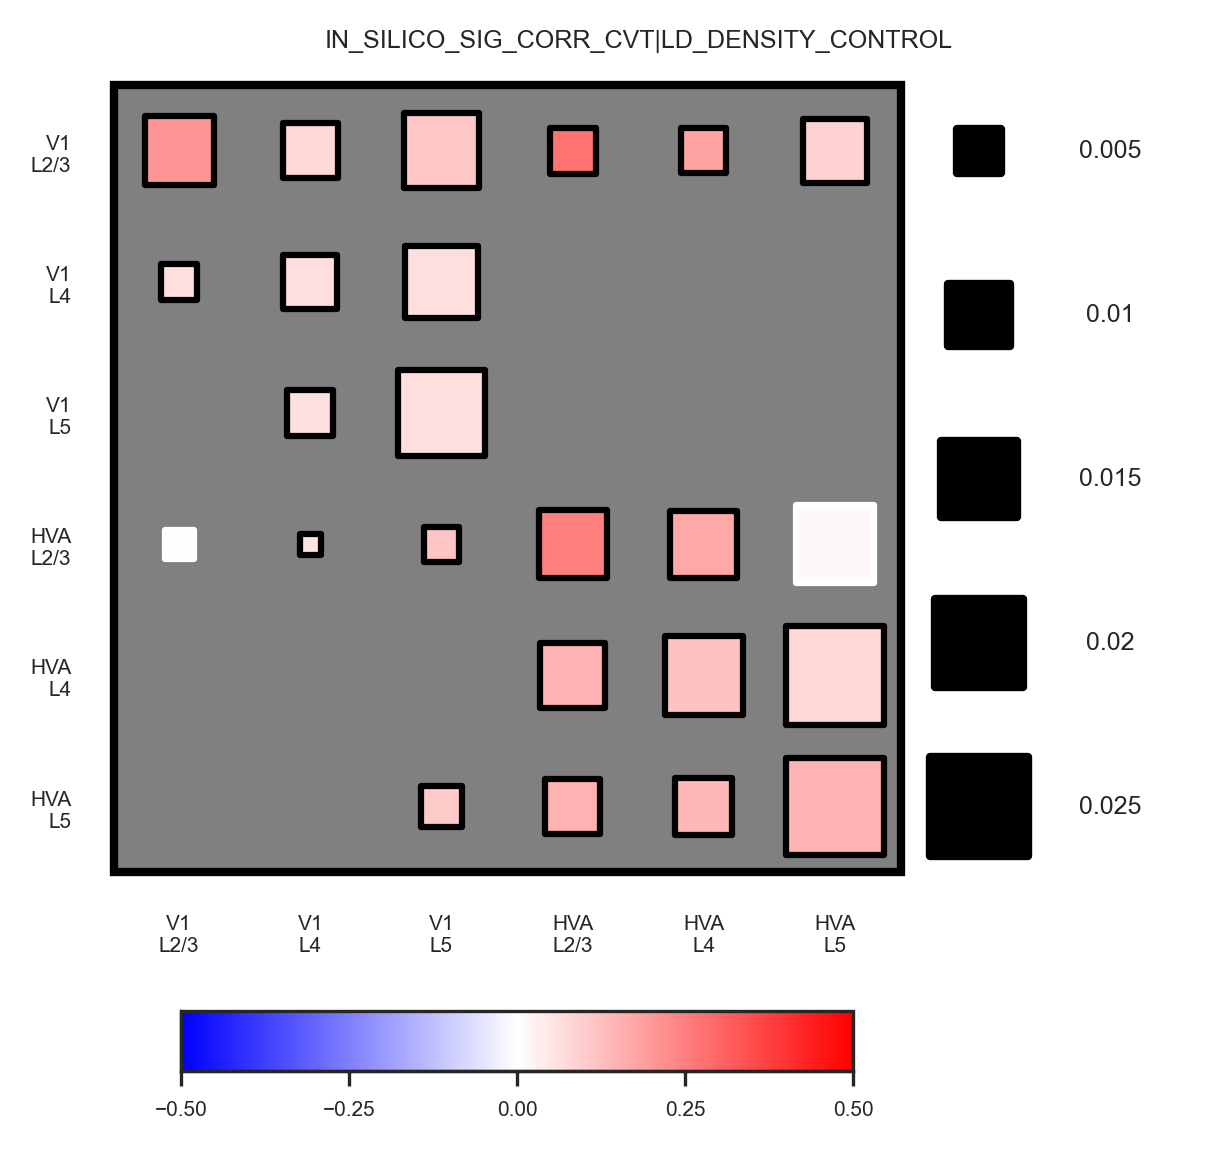

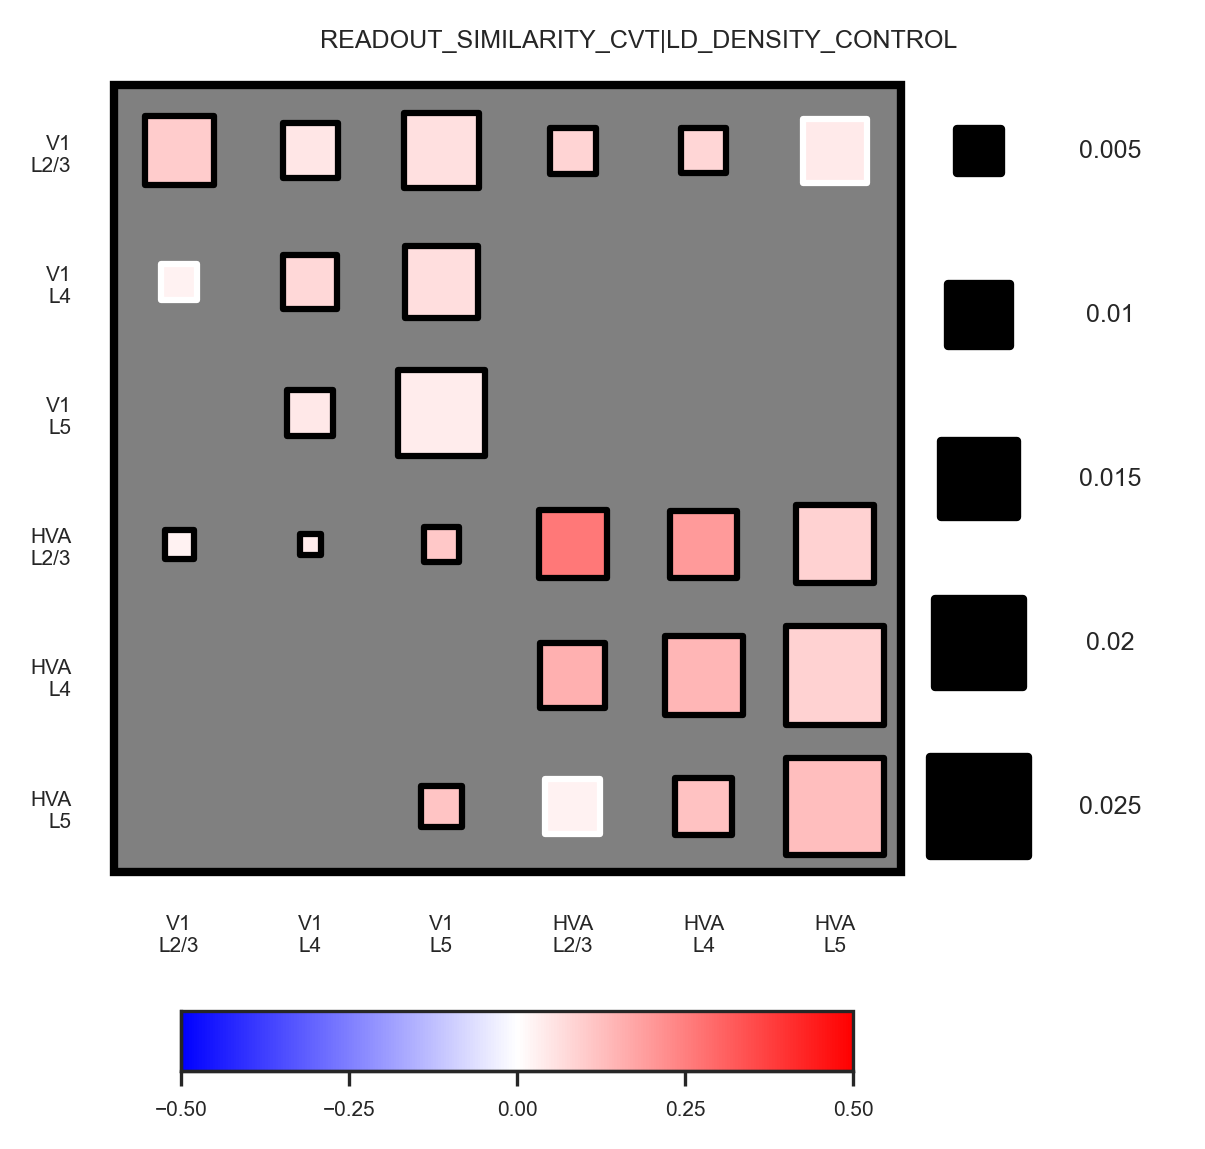

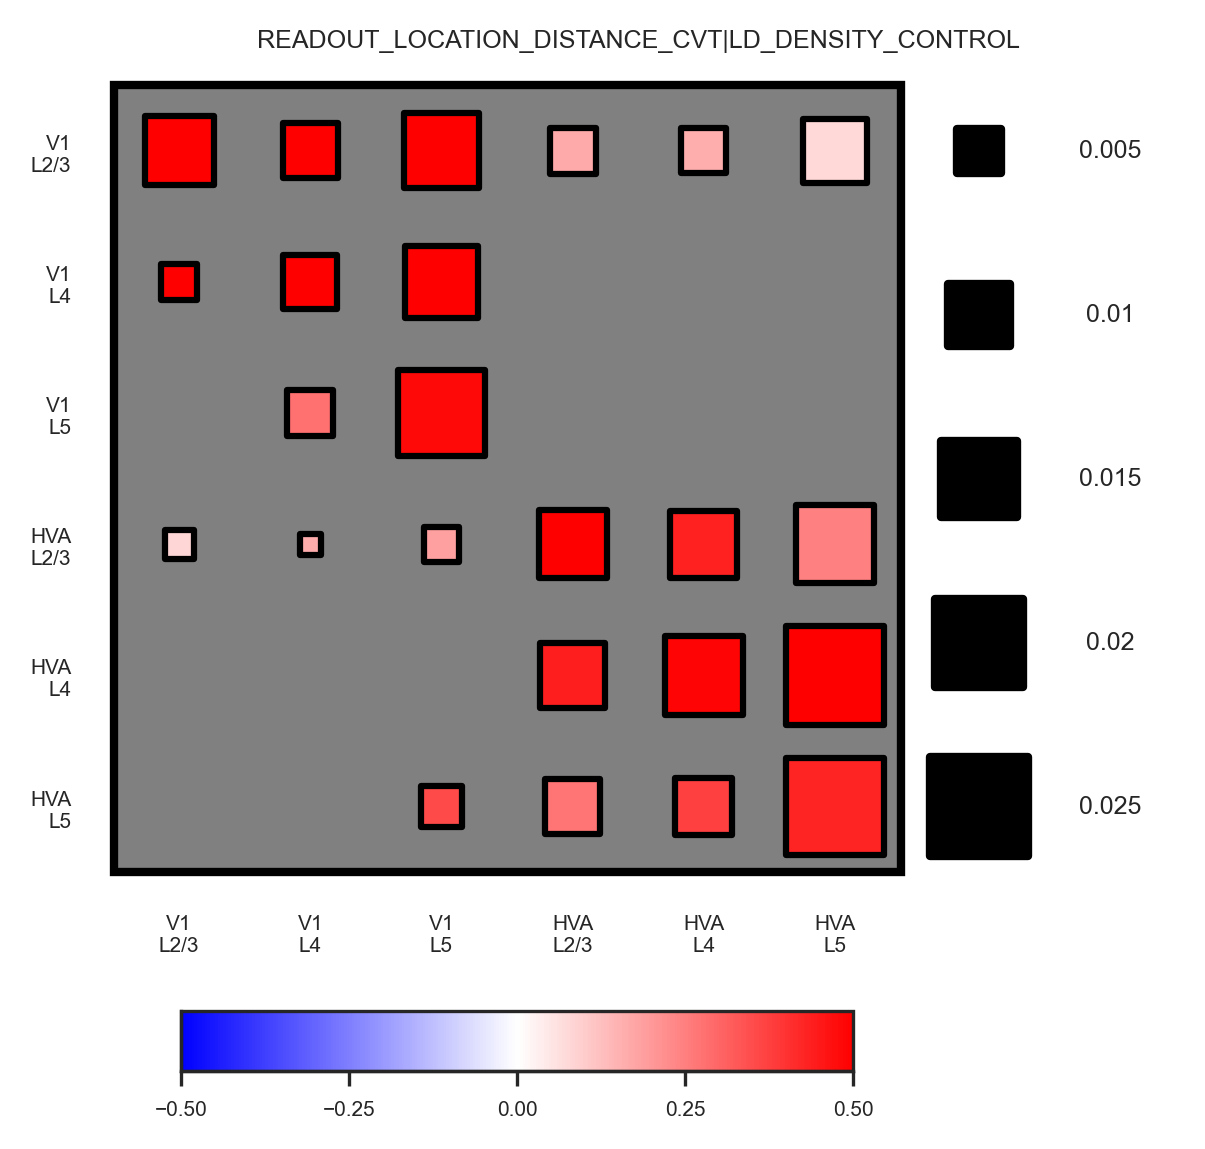

In [10]:
for variable in [
    like2like.Variables.IN_SILICO_SIG_CORR_CVT,
    like2like.Variables.READOUT_SIMILARITY_CVT,
    like2like.Variables.READOUT_LOCATION_DISTANCE_CVT,
]:
    like2like.plot_coef_matrix(
        glmm_rslts_layer,
        variable,
        like2like.Quantities.LD_DENSITY_CONTROL,
        edge_data,
        legend_size_step=5e-3,
        max_size=25e-3,
        min_size=0,
    )
    plt.title(variable.name + "|" + like2like.Quantities.LD_DENSITY_CONTROL.name)
